LIBRARY

In [1]:
import numpy as np
import pandas as pd
import requests
import sys
import bs4
import re
import urllib.request
import itertools
from collections import Counter
from matplotlib import pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
from selenium import webdriver
from selenium.webdriver.common.alert import Alert

In [3]:
cpath = 'C:/Users/user/Dropbox/Taehoon/github_local/chromedriver'
# cpath = 'C:/Users\/lth3512/OneDrive - NEXON COMPANY/문서/GitHub/chromedriver'
driver = webdriver.Chrome(executable_path=cpath)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
driver.get('https://dhlottery.co.kr/gameResult.do?method=byWin')

In [5]:
windows_list = driver.window_handles
print(windows_list)

['CDwindow-F70C3BB9A0D764AF16A47FE92EF0332D']


In [6]:
today_round = driver.find_element_by_class_name('win_result')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


In [7]:
today_round_number = today_round.text.split('회')[0]

### get total lotto number

In [8]:
def get_lotto_num(page):
    search_url = "https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={page}"
    response = urllib.request.urlopen(search_url.format(page=page))
    lotto_data = response.read()
    soup = bs4.BeautifulSoup(lotto_data)
    ret = []
    newret = []
    for winnums in soup.findAll('div', attrs={'class': 'nums'}):
        winnum = winnums.findAll('span')
        ret.append(winnum)
    ret = ret[0]
    for i in ret:
        string = str(i)
        onlynum =  re.sub('<.+?>','', string, 0, re.I|re.S)
        newret.append(onlynum)
        newret = list(map(int, newret))
    return newret

In [9]:
return_list=[]
for i in range(1,int(today_round_number)):
    if i%100 ==0:
        print(i)
    return_list.append(get_lotto_num(i))

100
200
300
400
500
600
700
800
900


In [31]:
seg_select = 100

In [32]:
return_list_seg = return_list[0:seg_select]

In [33]:
all_num = list(itertools.chain(*return_list_seg))
all_num= pd.DataFrame(all_num,columns=["num"])
dict_result = Counter(all_num.num)
df = pd.DataFrame.from_dict(dict_result, orient='index').reset_index().sort_values("index").reset_index(drop=True)
df.rename(columns = {'index' : 'num',0:"count_num"}, inplace = True)

In [34]:
# threshold  of likely or unlikely 
threshold = (int(seg_select) * 7)/45
threshold

15.555555555555555

In [35]:
df["Unlikely"] = list(map(int,df.count_num<=threshold))

plotting

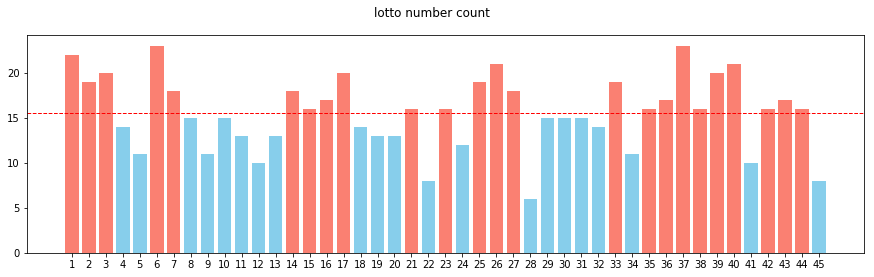

In [36]:
from matplotlib import pyplot as plt

t1 = df[df['count_num']>threshold]
t2 = df[df['count_num']<=threshold]

plt.rcParams["figure.figsize"] = (15,4)
y = df.count_num
x = df.num

plt.bar(t1.num, t1['count_num'], color='salmon')
plt.bar(t2.num, t2['count_num'], color='skyblue')
plt.axhline(y=threshold,linewidth=1, color='red' ,linestyle='--' )

# plt.bar(x, y, width=0.7)
plt.xticks (x)
plt.suptitle("lotto number count")
plt.show()

In [40]:
def plot_cum(seg_select):
#     seg_select = 100
    return_list_seg = return_list[0:seg_select]
    
    all_num = list(itertools.chain(*return_list_seg))
    all_num= pd.DataFrame(all_num,columns=["num"])
    dict_result = Counter(all_num.num)
    df = pd.DataFrame.from_dict(dict_result, orient='index').reset_index().sort_values("index").reset_index(drop=True)
    df.rename(columns = {'index' : 'num',0:"count_num"}, inplace = True)
    
    # threshold  of likely or unlikely 
    threshold = (int(seg_select) * 7)/45
    threshold
    
    df["Unlikely"] = list(map(int,df.count_num<=threshold))
    
    t1 = df[df['count_num']>threshold]
    t2 = df[df['count_num']<=threshold]

    plt.rcParams["figure.figsize"] = (15,4)
    y = df.count_num
    x = df.num

    plt.bar(t1.num, t1['count_num'], color='salmon')
    plt.bar(t2.num, t2['count_num'], color='skyblue')
    plt.axhline(y=threshold,linewidth=1, color='red' ,linestyle='--' )

    # plt.bar(x, y, width=0.7)
    plt.xticks (x)
    plt.suptitle("lotto number count")
    plt.show()

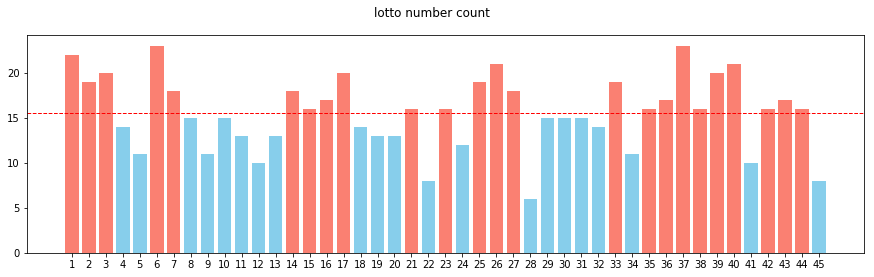

In [41]:
plot_cum(100)

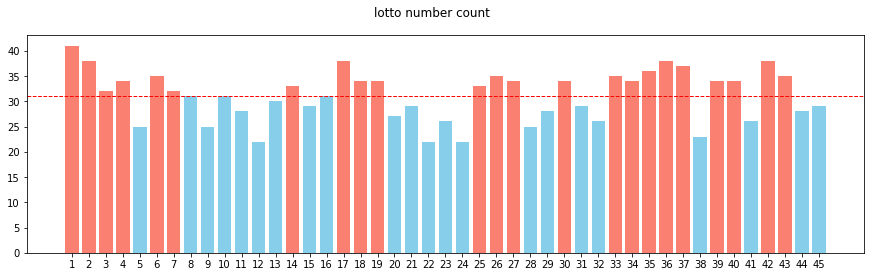

In [42]:
plot_cum(200)

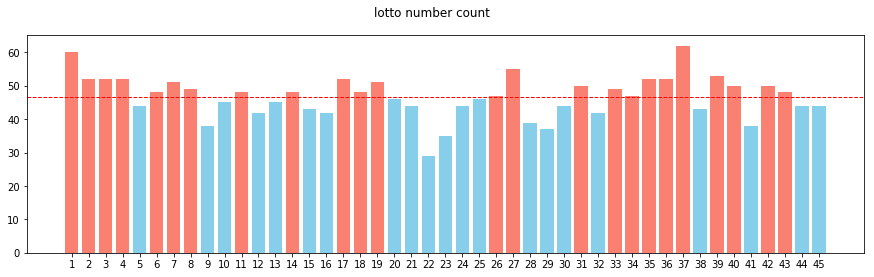

In [43]:
plot_cum(300)

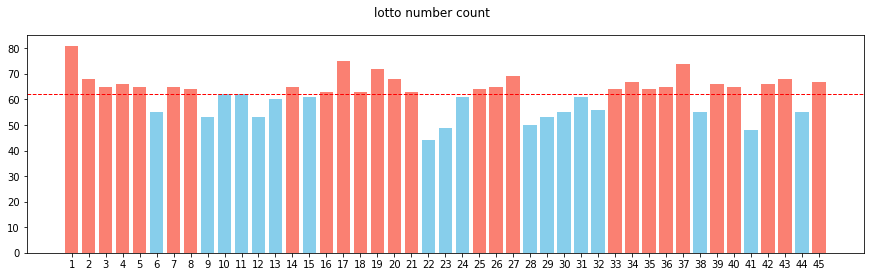

In [44]:
plot_cum(400)

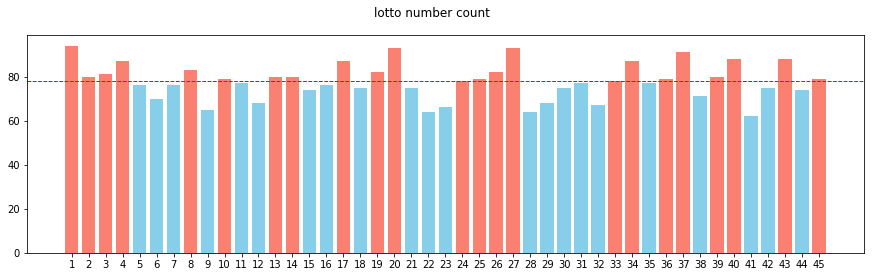

In [45]:
plot_cum(500)

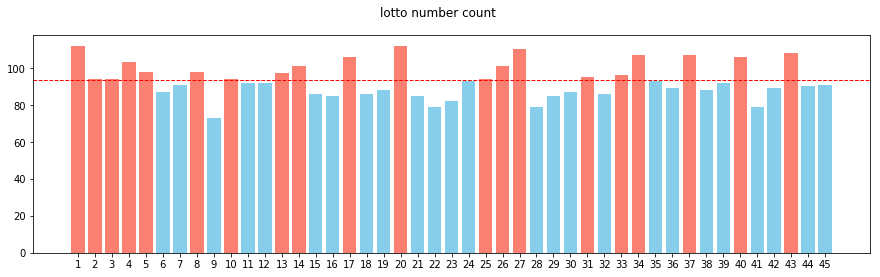

In [46]:
plot_cum(600)

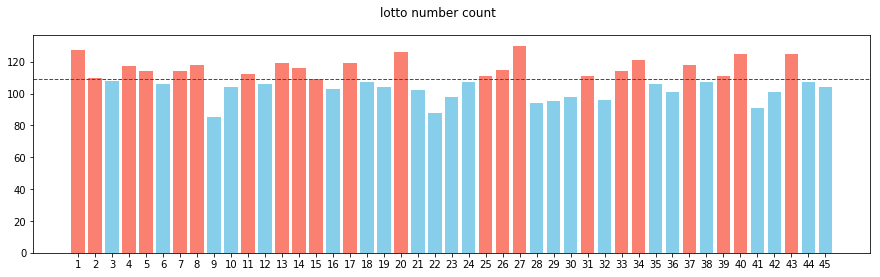

In [47]:
plot_cum(700)

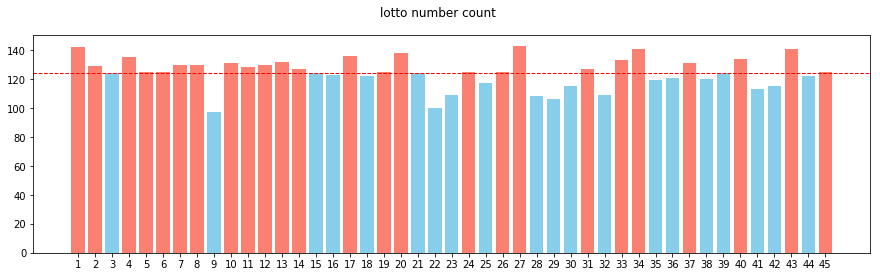

In [48]:
plot_cum(800)

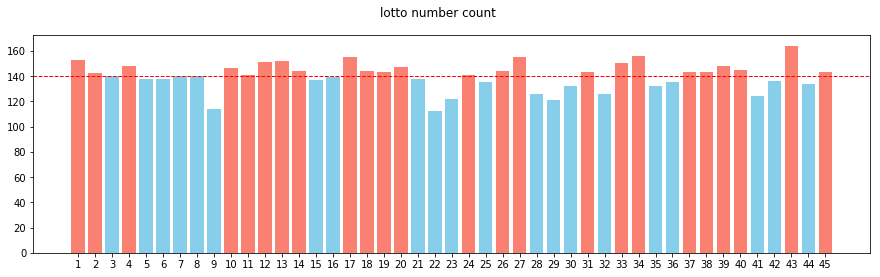

In [49]:
plot_cum(900)

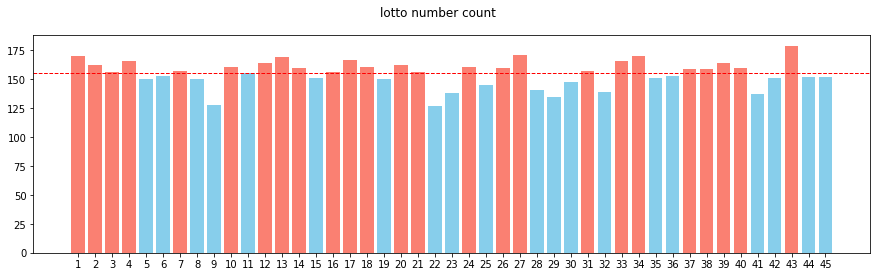

In [51]:
plot_cum(1000)

### seg division

In [53]:
def plot_cum(seg_start, seg_end):
    return_list_seg = return_list[seg_start:seg_end]
    round_num = seg_end-seg_start
    
    
    all_num = list(itertools.chain(*return_list_seg))
    all_num= pd.DataFrame(all_num,columns=["num"])
    dict_result = Counter(all_num.num)
    df = pd.DataFrame.from_dict(dict_result, orient='index').reset_index().sort_values("index").reset_index(drop=True)
    df.rename(columns = {'index' : 'num',0:"count_num"}, inplace = True)
    
    # threshold  of likely or unlikely 
    threshold = (int(round_num) * 7)/45
    threshold
    
    df["Unlikely"] = list(map(int,df.count_num<=threshold))
    
    t1 = df[df['count_num']>threshold]
    t2 = df[df['count_num']<=threshold]

    plt.rcParams["figure.figsize"] = (15,4)
    y = df.count_num
    x = df.num

    plt.bar(t1.num, t1['count_num'], color='salmon')
    plt.bar(t2.num, t2['count_num'], color='skyblue')
    plt.axhline(y=threshold,linewidth=1, color='red' ,linestyle='--' )

    # plt.bar(x, y, width=0.7)
    plt.xticks (x)
    plt.suptitle("lotto number count")
    plt.show()

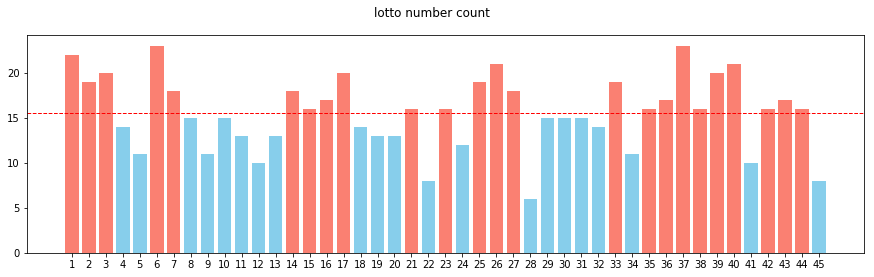

In [54]:
plot_cum(0, 100)

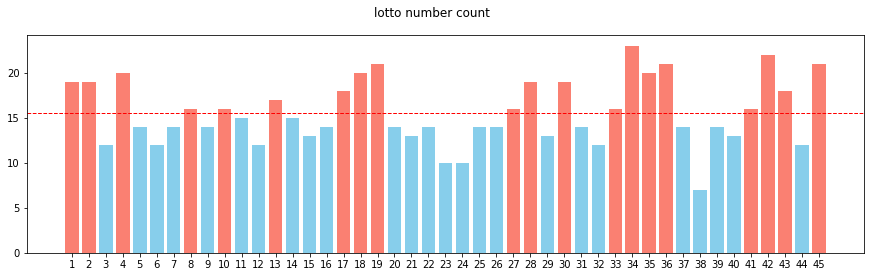

In [55]:
plot_cum(100, 200)

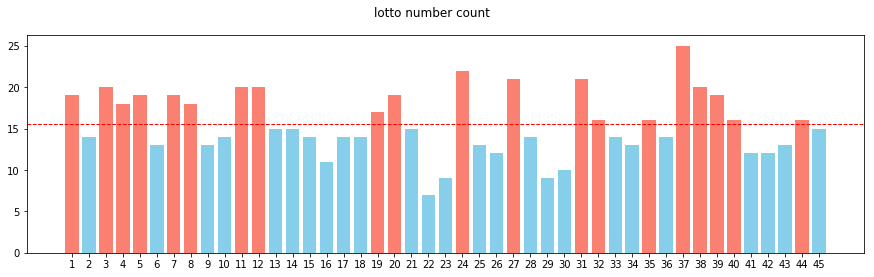

In [56]:
plot_cum(200, 300)

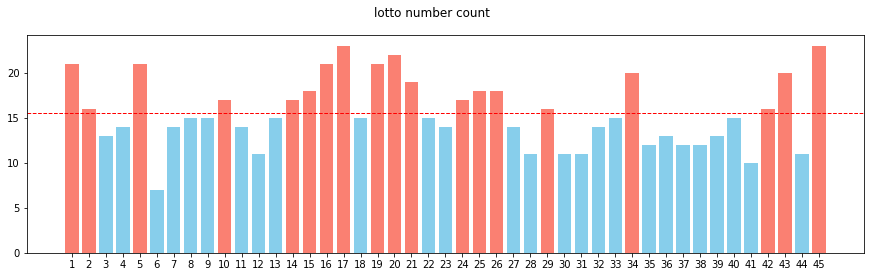

In [57]:
plot_cum(300, 400)

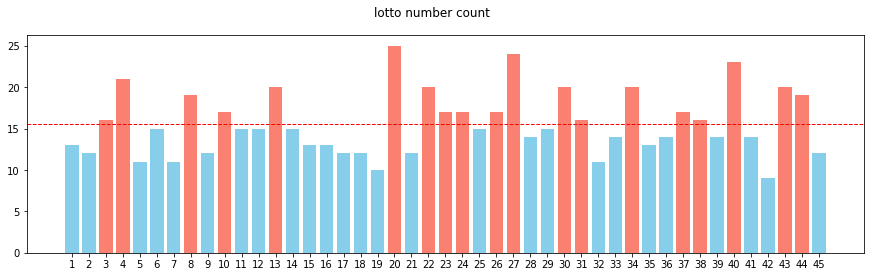

In [58]:
plot_cum(400, 500)

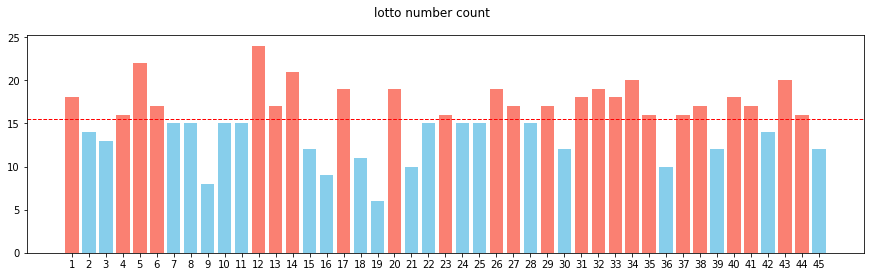

In [59]:
plot_cum(500, 600)

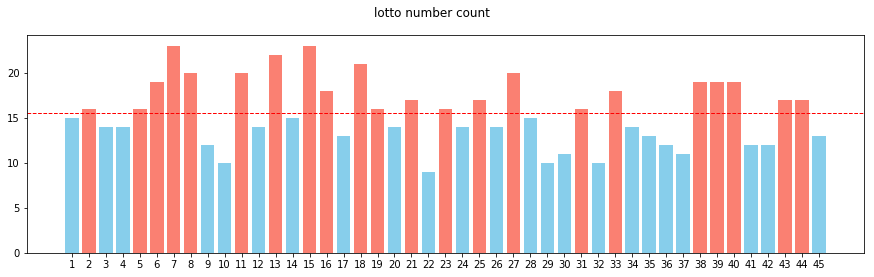

In [60]:
plot_cum(600, 700)

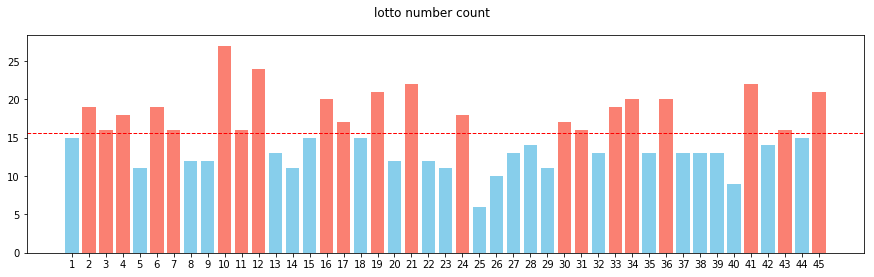

In [61]:
plot_cum(700, 800)

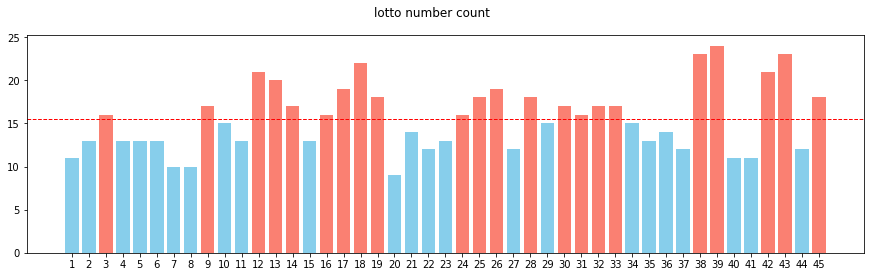

In [62]:
plot_cum(800, 900)

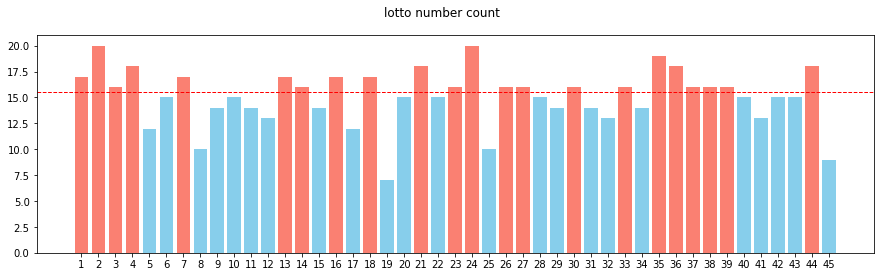

In [63]:
plot_cum(900, 1000)